In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("C:/Users/82107/python_project/anaconda_projects/2주차/2주차/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [7]:
#0이 가능한 변수들
#Pregnancies: 임신 횟수는 0이 가능하다
#outcome: 당뇨에 걸리지 않으면 0이라 표시한다
#DiabetesPedigreeFunction: 당뇨병 혈통이 0인 것이 불가능하지 않다
zero_possible=["Pregnancies", "DiabetesPedigreeFunction", "Outcome"]
#0이 불가능한 변수들
#혈당, 혈압, 피부두께, 인슐린, BMI, 나이는 0이 될 수가 없는 변수들이다
zero_impossible = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]

In [8]:
#0과 NA의 분포를 요약한 표
summary=pd.DataFrame({
    "zero_count":(df==0).sum(),
    "zero_percent":((df==0).mean()*100).round(2),
    "na_count":df.isna().sum(),
    "na_percent":(df.isna().mean()*100).round(2)
}).sort_values(by="zero_count",ascending=False)
print(summary)

                          zero_count  zero_percent  na_count  na_percent
Outcome                          500         65.10         0         0.0
Insulin                          374         48.70         0         0.0
SkinThickness                    227         29.56         0         0.0
Pregnancies                      111         14.45         0         0.0
BloodPressure                     35          4.56         0         0.0
BMI                               11          1.43         0         0.0
Glucose                            5          0.65         0         0.0
DiabetesPedigreeFunction           0          0.00         0         0.0
Age                                0          0.00         0         0.0


In [9]:
#0이 불가능한 변수의 0값을 NaN으로 바꾸기
df_eda=df.copy()
df_eda[zero_impossible] = df_eda[zero_impossible].replace(0, np.nan)


In [10]:
missing_after = df_eda[zero_impossible].isna().sum().sort_values(ascending=False)
print("결측값 개수")
print(missing_after)

결측값 개수
Insulin          374
SkinThickness    227
BloodPressure     35
BMI               11
Glucose            5
Age                0
dtype: int64


In [11]:
df_eda


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
ins=df_eda["Insulin"]
ins

0        NaN
1        NaN
2        NaN
3       94.0
4      168.0
       ...  
763    180.0
764      NaN
765    112.0
766      NaN
767      NaN
Name: Insulin, Length: 768, dtype: float64

In [14]:
print("NaN 개수:",ins.isna().sum())
print("NaN 비율:",round(ins.isna().mean()*100,2))
print("Insulin 기본통계:")
print(ins.describe())

NaN 개수: 374
NaN 비율: 48.7
Insulin 기본통계:
count    394.000000
mean     155.548223
std      118.775855
min       14.000000
25%       76.250000
50%      125.000000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64


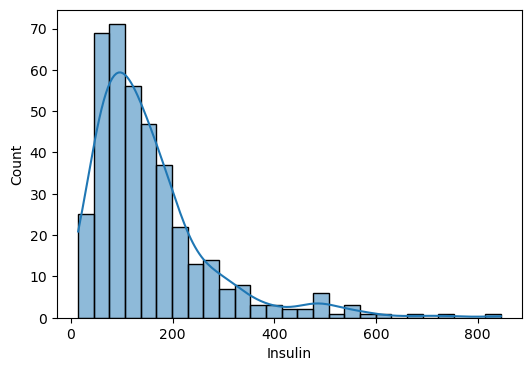

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(ins.dropna(),kde=True)
plt.show()

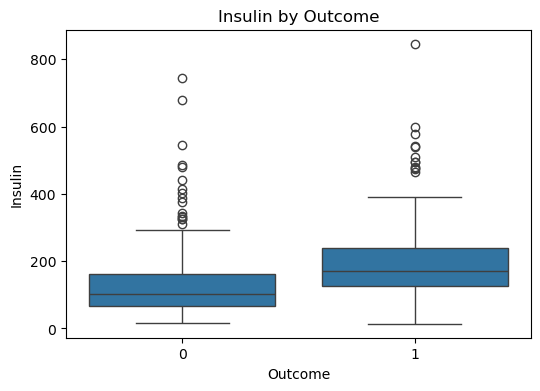

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_eda["Outcome"], y=df_eda["Insulin"])
plt.title("Insulin by Outcome")
plt.show()

In [17]:
#히스토그램에서 본 것처럼 인슐린은 값의 분포가 오른쪽 꼬리 형태이며 이상치에 민감할 수 있음
#median으로 결측치를 대체한다
median_insulin=ins.median()
df_insulin_filled = df_eda.copy()
df_insulin_filled["Insulin"]=df_insulin_filled["Insulin"].fillna(median_insulin)
print("insulin median 값:",median_insulin)
print("NaN 대체 후 NaN개수:",df_insulin_filled["Insulin"].isna().sum())

insulin median 값: 125.0
NaN 대체 후 NaN개수: 0


In [18]:
df_insulin_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,125.0,30.1,0.349,47,1


In [19]:
df_eda=df_insulin_filled.copy()
df_eda

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,125.0,30.1,0.349,47,1


In [20]:
skinthick=df_eda["SkinThickness"]
skinthick

0      35.0
1      29.0
2       NaN
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766     NaN
767    31.0
Name: SkinThickness, Length: 768, dtype: float64

In [21]:
print("NaN 개수:",skinthick.isna().sum())
print("NaN 비율:",round(skinthick.isna().mean()*100,2))
print("SkinThickness 기본통계:")
print(skinthick.describe())

NaN 개수: 227
NaN 비율: 29.56
SkinThickness 기본통계:
count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64


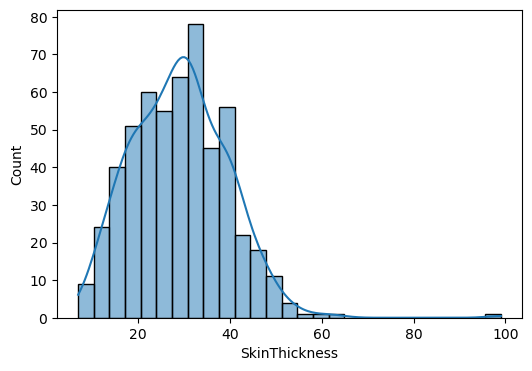

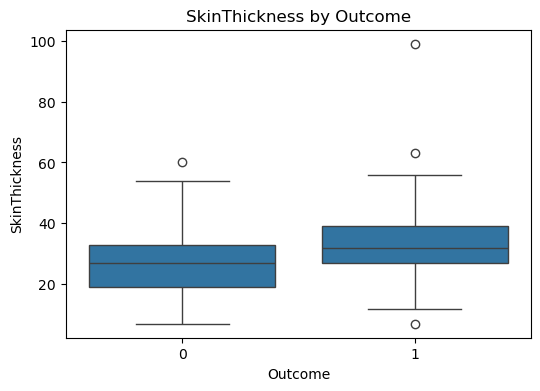

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(skinthick.dropna(),kde=True)
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df_eda["Outcome"], y=df_eda["SkinThickness"])
plt.title("SkinThickness by Outcome")
plt.show()


In [23]:
median_SkinThickness=skinthick.median()
df_SkinThickness_filled = df_eda.copy()
df_SkinThickness_filled["SkinThickness"]=df_SkinThickness_filled["SkinThickness"].fillna(median_SkinThickness)
print("SkinThickness median 값:",median_SkinThickness)
print("NaN 대체 후 NaN개수:",df_SkinThickness_filled["SkinThickness"].isna().sum())

SkinThickness median 값: 29.0
NaN 대체 후 NaN개수: 0


In [24]:
df_SkinThickness_filled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [25]:
df_eda=df_SkinThickness_filled.copy()

In [26]:
BloodPressure=df_eda["BloodPressure"]
BloodPressure
print("NaN 개수:",BloodPressure.isna().sum())
print("NaN 비율:",round(BloodPressure.isna().mean()*100,2))
print("BloodPressure 기본통계:")
print(BloodPressure.describe())


NaN 개수: 35
NaN 비율: 4.56
BloodPressure 기본통계:
count    733.000000
mean      72.405184
std       12.382158
min       24.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


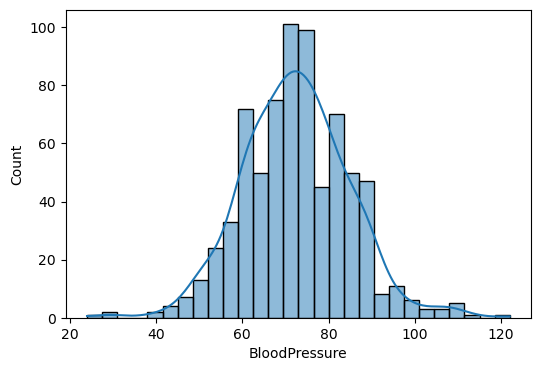

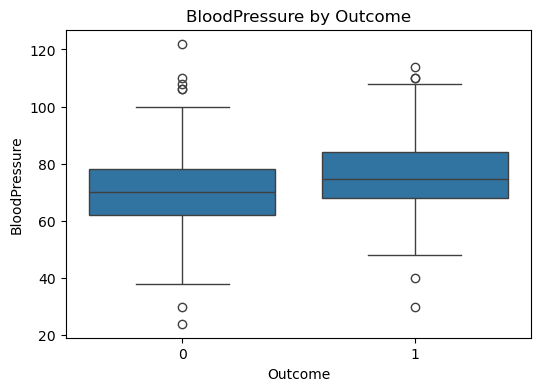

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(BloodPressure.dropna(),kde=True)
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df_eda["Outcome"], y=df_eda["BloodPressure"])
plt.title("BloodPressure by Outcome")
plt.show()


In [28]:
#그래프의 분포가 균일한 모양이므로 대체값을 평균으로 사용
mean_BloodPressure=BloodPressure.mean()
df_BloodPressure_filled = df_eda.copy()
df_BloodPressure_filled["BloodPressure"]=df_BloodPressure_filled["BloodPressure"].fillna(mean_BloodPressure)
print("BloodPressure mean 값:",mean_BloodPressure)
print("NaN 대체 후 NaN개수:",df_BloodPressure_filled["BloodPressure"].isna().sum())

BloodPressure mean 값: 72.40518417462484
NaN 대체 후 NaN개수: 0


In [29]:
df_eda=df_BloodPressure_filled.copy()
df_eda

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [30]:
df_eda.isna().sum()

Pregnancies                  0
Glucose                      5
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [31]:
BMI=df_eda["BMI"]
print("NaN 개수:",BMI.isna().sum())
print("NaN 비율:",round(BMI.isna().mean()*100,2))
print("BMI 기본통계:")
print(BMI.describe())


NaN 개수: 11
NaN 비율: 1.43
BMI 기본통계:
count    757.000000
mean      32.457464
std        6.924988
min       18.200000
25%       27.500000
50%       32.300000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64


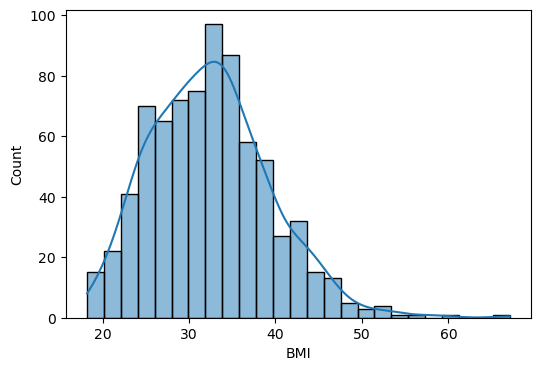

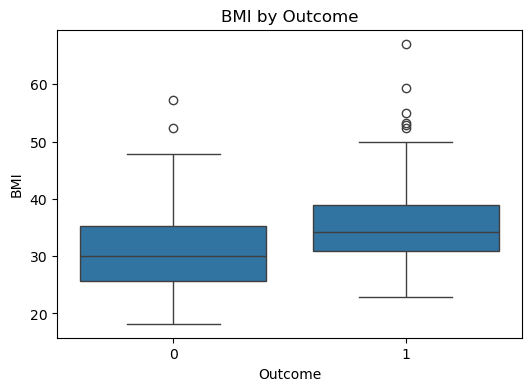

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(BMI.dropna(),kde=True)
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df_eda["Outcome"], y=df_eda["BMI"])
plt.title("BMI by Outcome")
plt.show()


In [33]:
#히스토그램에서 오른쪽 꼬리 분포를 보이며 이상치에 민감하게 반응할 수 있으므로 median을 결측치를 채워넣는데에 사용한다
median_BMI=BMI.median()
df_BMI_filled = df_eda.copy()
df_BMI_filled["BMI"]=df_BMI_filled["BMI"].fillna(median_BMI)
print("BMI median 값:",median_BMI)
print("NaN 대체 후 NaN개수:",df_BMI_filled["BMI"].isna().sum())

BMI median 값: 32.3
NaN 대체 후 NaN개수: 0


In [34]:
df_eda=df_BMI_filled.copy()

In [35]:
Glucose=df_eda["Glucose"]
print("NaN 개수:",Glucose.isna().sum())
print("NaN 비율:",round(Glucose.isna().mean()*100,2))
print("Glucose 기본통계:")
print(Glucose.describe())


NaN 개수: 5
NaN 비율: 0.65
Glucose 기본통계:
count    763.000000
mean     121.686763
std       30.535641
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64


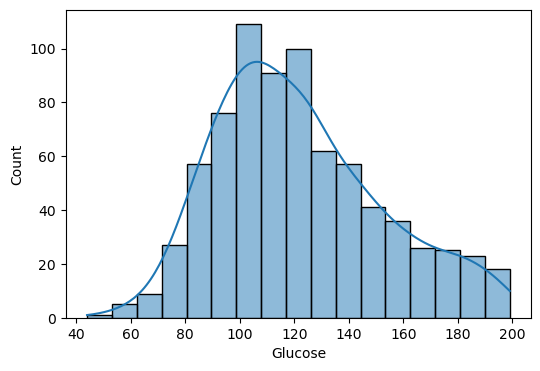

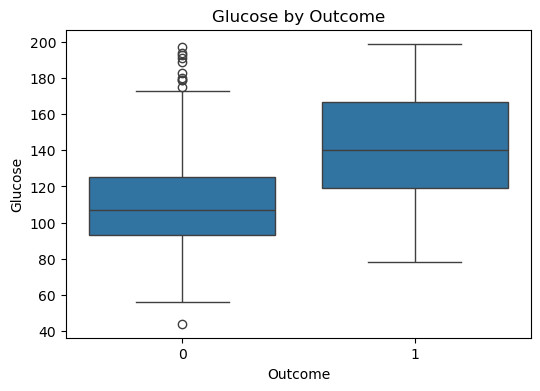

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(Glucose.dropna(),kde=True)
plt.show()
plt.figure(figsize=(6,4))
sns.boxplot(x=df_eda["Outcome"], y=df_eda["Glucose"])
plt.title("Glucose by Outcome")
plt.show()


In [37]:
#Glucose는 결측값이 적기도 하고 히스토그램 분포가 약간의 비대칭을 보이기 때문에 무난하게 median으로 결측치를 채운다
median_Glucose=Glucose.median()
df_Glucose_filled = df_eda.copy()
df_Glucose_filled["Glucose"]=df_insulin_filled["Glucose"].fillna(median_Glucose)
print("Glucose median 값:",median_Glucose)
print("NaN 대체 후 NaN개수:",df_Glucose_filled["Glucose"].isna().sum())

Glucose median 값: 117.0
NaN 대체 후 NaN개수: 0


In [38]:
df_eda=df_Glucose_filled.copy()
df_eda

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [39]:
df_eda.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [40]:
df1=df_eda.copy()
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [41]:
# 2) 목표변수 / 설명변수 설정
# 파생 변수는 추가하고, 필요 없는 변수는 빼기

X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df1['Outcome'] # Y값에는 결측치가 존재해서는 안됨

In [42]:
# 3) 학습데이터와 검증데이터를 분할
# pip install scikit-learn
from sklearn.model_selection import train_test_split

In [43]:
train_test_split(X,Y) # X 데이터의 학습, 검증 데이터 & Y 데이터의 학습, 검증데이터 4개로 분리됨

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 333           12    106.0           80.0           29.0    125.0  23.6   
 384            1    125.0           70.0           24.0    110.0  24.3   
 244            2    146.0           76.0           35.0    194.0  38.2   
 138            0    129.0           80.0           29.0    125.0  31.2   
 570            3     78.0           70.0           29.0    125.0  32.5   
 ..           ...      ...            ...            ...      ...   ...   
 38             2     90.0           68.0           42.0    125.0  38.2   
 630            7    114.0           64.0           29.0    125.0  27.4   
 155            7    152.0           88.0           44.0    125.0  50.0   
 396            3     96.0           56.0           34.0    115.0  24.7   
 509            8    120.0           78.0           29.0    125.0  25.0   
 
      DiabetesPedigreeFunction  Age  
 333                     0.137   44  
 384                  

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)
# train_test_split()에 별도의 옵션을 지정하지 않으면 75:25로 학습:검증 분할됨
# random_state을 지정해야 같은 결과가 나옴

In [45]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

from IPython.display import display


In [47]:
#pipeline은 일이 진행되는 과정을 적음(결측값 채우기->데이터 스케일링->로지스틱 회귀 학습
#로지스틱 회귀는 값이 큰 변수에 민감하게 반응하므로 (x-mean)/std으로 스케일을 맞춤
#충분한 학습량을 위해 5000번까지 시행 허용
pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("logisticregression", LogisticRegression(max_iter=5000, random_state=1234))
])

In [48]:
#gridsearch: 가장 좋은 모델을 찾는 방법
#solver:답(계수)을 찾는 방법
#liblinear:이진 분류 전용(데이터가 크지 않을 때 사용)
#lbfgs, newton-cg는 solver의 종류(둘다 L1은 지원 안함)
#saga는 데이터가 클 때 쓰는 solver
#elasticnet은 L1과 L2를 섞는 solver
#penalty: 학습 데이터에 너무 딱 맞아서 새 데이터를 학습하지 못하는 과적합을 억제하기 위함
#L1: 결과는 [변수*계수]인데 계수가 너무 작은 건 0으로 취급함(변수가 너무 많거나 어떤 변수가 중요한지 모를 때 유용하게 쓰임)
#L2: 계수를 조금씩 낮춤(대부분의 변수가 의미있거나 변수끼리 상관관계가 높고 안정적인 예측이 중요할 때 유용하게 쓰임)
#C: penalty규제의 세기: C가 작음->규제 강함->모델 단순/C가 큼->규제 약함->모델 복잡
#class_weight: 불균형 데이터용 옵션
param_grid = [
    {   # liblinear는 l1/l2 둘 다 가능 (작은 데이터에 자주 씀)
        "logisticregression__solver": ["liblinear"],
        "logisticregression__penalty": ["l1", "l2"],
        "logisticregression__C": [0.01, 0.1, 1, 10, 100],    # 규제 강도 조절(중요)
        "logisticregression__class_weight": [None, "balanced"]  
    },
    {   # lbfgs / newton-cg는 l2만 가능
        "logisticregression__solver": ["lbfgs", "newton-cg"],
        "logisticregression__penalty": ["l2"],
        "logisticregression__C": [0.01, 0.1, 1, 10, 100],
        "logisticregression__class_weight": [None, "balanced"]
    },
    {   # saga는 l1/l2 가능 (대규모에도 쓸 수 있음)
        "logisticregression__solver": ["saga"],
        "logisticregression__penalty": ["l1", "l2"],
        "logisticregression__C": [0.01, 0.1, 1, 10, 100],
        "logisticregression__class_weight": [None, "balanced"]
    },
    {   # saga는 elasticnet도 가능 (l1과 l2를 섞는 규제)
        "logisticregression__solver": ["saga"],
        "logisticregression__penalty": ["elasticnet"],
        "logisticregression__l1_ratio": [0.1, 0.5, 0.9],     # 0이면 거의 l2, 1이면 거의 l1(섞음)
        "logisticregression__C": [0.01, 0.1, 1, 10, 100],
        "logisticregression__class_weight": [None, "balanced"]
    }
]
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)
#cv:모델을 어떻게 평가할지 정하는 설정->데이터를 5등분해 클래스 비율을 유지하면서 무작위로 섞은 후 K-Fold방식 사용

In [49]:
#모델 판단 최종 기준은 roc_auc(accuracy랑 f1도 계산하긴 함)
scoring = {"accuracy": "accuracy", "f1": "f1", "roc_auc": "roc_auc"}

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring=scoring,
    refit="roc_auc",    
    cv=cv,
    n_jobs=-1           
)

# 실제 학습 + 탐색
grid.fit(X_train, Y_train)

# 가장 좋은 모델(best_estimator_) 꺼내기
best_model = grid.best_estimator_

print("Best Params:", grid.best_params_)      # 최적 하이퍼파라미터 조합
#결과: solver:saga, penalty:elasticnet, L1_ratio:0.5(1이랑 2 반반), C:0.1(규제 강함), class_weight:balanced
#결과해석: 모델은 너무 복잡해지지 않도록 강한 규제를 사용하되 L1과 L2를 균형 있게 섞은 elasticnet이 제일 효과적이었고 클래스 불균형 보정을 적용하는 것이 성능이 좋다
print("Best CV (roc_auc) score:", grid.best_score_)  # 교차검증 평균 점수


Best Params: {'logisticregression__C': 0.1, 'logisticregression__class_weight': 'balanced', 'logisticregression__l1_ratio': 0.5, 'logisticregression__penalty': 'elasticnet', 'logisticregression__solver': 'saga'}
Best CV (roc_auc) score: 0.8411440620782725


In [50]:
#모델들의 성능을 roc_auc를 기준으로 순위를 매김
results = pd.DataFrame(grid.cv_results_)
show_cols = ["mean_test_roc_auc", "mean_test_f1", "mean_test_accuracy", "rank_test_roc_auc", "params"]
display(results[show_cols].sort_values("rank_test_roc_auc").head(10))

,mean_test_roc_auc,mean_test_f1,mean_test_accuracy,rank_test_roc_auc,params
70,0.841144,0.676372,0.765562,1,"{'logisticregression__C': 0.1, 'logisticregres..."
66,0.840768,0.619054,0.770780,2,"{'logisticregression__C': 0.1, 'logisticregres..."
71,0.840733,0.677776,0.769070,3,"{'logisticregression__C': 0.1, 'logisticregres..."
67,0.840539,0.626389,0.775982,4,"{'logisticregression__C': 0.1, 'logisticregres..."
46,0.840531,0.679640,0.769070,5,"{'logisticregression__C': 0.1, 'logisticregres..."
6,0.840333,0.686988,0.762114,6,"{'logisticregression__C': 0.1, 'logisticregres..."
68,0.839736,0.623622,0.777706,7,"{'logisticregression__C': 0.1, 'logisticregres..."
5,0.839427,0.631033,0.770765,8,"{'logisticregression__C': 0.1, 'logisticregres..."
77,0.839362,0.680811,0.767316,9,"{'logisticregression__C': 1, 'logisticregressi..."
50,0.839227,0.680811,0.767316,10,"{'logisticregression__C': 1, 'logisticregressi..."


In [66]:
#실제 정답(y_true)과 모델 예측값(y_pred), 예측 확률(y_proba)를 받아서 평가 지표들을 출력한다(5개의 K-Fold)
def evaluate_binary(y_true, y_pred, y_proba, title=""):
    # accuracy: 전체 중 맞춘 비율
    acc = accuracy_score(y_true, y_pred)
    # precision: 1이라고 예측한 것 중 실제 1의 비율(양성 판단에 중요)
    prec = precision_score(y_true, y_pred, zero_division=0)
    # recall: 실제 1 중에서 1로 맞춘 비율
    rec = recall_score(y_true, y_pred, zero_division=0)
    # f1: precision/recall의 조화평균(불균형 방지)
    f1v = f1_score(y_true, y_pred, zero_division=0)
    # roc_auc: 임계값을 바꿔가며 분류 성능을 종합적으로 평가(확률 기반)
    auc = roc_auc_score(y_true, y_proba)

    print(f"\n[{title}]")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1       : {f1v:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")

In [67]:
#학습 데이터와 테스트 데이터의 성능 비교
#[:,1]:1일 확률만 가져와라
train_proba = best_model.predict_proba(X_train)[:, 1]
test_proba  = best_model.predict_proba(X_test)[:, 1]


In [68]:
#threshold=0.5->0.5이상이면 1, 아니면 0
train_pred = (train_proba >= 0.5).astype(int)
test_pred  = (test_proba  >= 0.5).astype(int)

evaluate_binary(Y_train, train_pred, train_proba, "TRAIN (threshold=0.5)")
evaluate_binary(Y_test,  test_pred,  test_proba,  "TEST  (threshold=0.5)")
#결과 해석
#학습 데이터->roc-auc가 0.84이므로 매우 좋고 recall이 precision보다 높으므로 양성(1)을 놓치지 않으려는 성향을 띤다
#테스트 데이터: roc-auc가 0.83으로 매우 좋으며 학습 데이터와 거의 차이가 안 나므로 과적합이 거의 없다(일반화 성능이 우수하다)


[TRAIN (threshold=0.5)]
Accuracy : 0.7708
Precision: 0.6457
Recall   : 0.7310
F1       : 0.6857
ROC-AUC  : 0.8484

[TEST  (threshold=0.5)]
Accuracy : 0.7500
Precision: 0.6533
Recall   : 0.6901
F1       : 0.6712
ROC-AUC  : 0.8386


In [69]:
print("\n[TRAIN classification_report]")
print(classification_report(Y_train, train_pred))
#결과 해석: 0은 precision/recall/f1-score가 전반적으로 높으므로 0은 잘 맞췄다
#1은 precision이 0.65로 낮은 편이므로 1이라고 예측했는데 틀린 경우가 좀 있다
print("\n[TEST classification_report]")
print(classification_report(Y_test, test_pred))
#테스트 데이터도 학습 데이터와 패턴이 거의 비슷하므로 과적합이 심하지 않고 일반화가 괜찮다
print("\n[TEST confusion_matrix]")
print(confusion_matrix(Y_test, test_pred))
#TN = 95: 실제 0을 0으로 맞춤
#FP = 26: 실제 0인데 1이라고 잘못 예측 (거짓 양성)
#FN = 22: 실제 1인데 0이라고 잘못 예측 (거짓 음성)
#TP = 49: 실제 1을 1로 맞춤


[TRAIN classification_report]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       379
           1       0.65      0.73      0.69       197

    accuracy                           0.77       576
   macro avg       0.75      0.76      0.75       576
weighted avg       0.78      0.77      0.77       576


[TEST classification_report]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       121
           1       0.65      0.69      0.67        71

    accuracy                           0.75       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.75      0.75      0.75       192


[TEST confusion_matrix]
[[95 26]
 [22 49]]


In [ ]:
#최종 결과해석
(1) 전처리된 데이터로 Logistic Regression 파이프라인(결측치 처리 + 표준화 + 로지스틱 회귀)을 만들고, GridSearchCV로 하이퍼파라미터를 탐색해
saga + elasticnet(l1_ratio=0.5) + C=0.1 + class_weight=balanced 조합이 최적임을 확인했다.
(2) 최적 모델의 성능은 TEST 기준 ROC-AUC≈0.84, Accuracy≈0.75, F1≈0.67로 전반적으로 양호했고, TRAIN/TEST 성능 차이가 크지 않아 과적합이 심하지 않은
일반화 성능을 보였다.
(3) 혼동행렬(TEST)에서 FP=26, FN=22로 오경보(실제는 0인데 1로 예측)와 놓침(실제는 1인데 0으로 예측)이 모두 존재하며,
기본 threshold(0.5)에서는 양성(1) 탐지 재현율이 약 0.69 수준이었다.
(4) 정상 클래스(0) 성능이 precision=0.81, recall=0.79이므로 정상인 사람을 정상이라고 말해주는 비율이 높다->불필요하게 모두를 당뇨 의심이라고 하지 않고
정상 판정도 꽤 한다
(5) 당뇨(1)의 recall=0.69는 실제 당뇨 환자 71명 중 49는 잡고(TP) 22명은 놓친 것인데(FN) 당뇨 위험군을 어느 정도 걸러낼 수 있는 모델이라고 볼 수 있다.
(6) FN=0.22는 당뇨인데 정상이라고 판단해서 검사/관리 기회를 놓치는 사람이 22명이다->당뇨는 초기엔 증상이 약해서 조기 발견이 중요한데 혈당 관리 지연, 
합병증 위험 증가, 생활습관 개선 타이밍을 놓치는 등의 치명적인 문제를 일으킬 수 있다.
(7)FP=0.26은 정상인데 당뇨라고 판단해서 불필요한 추가 검사/불안이 생기는 26명을 의미->추가 혈액검사 비용, 스트레스, 병원 방문 비용 증가 등의 문제가 적지 않은 수치로
발생할 수 있다.
(8) precision이 0.65는 당뇨라고 예측한 사람 중 35%는 사실 정상일 수 있다는 의미-> 당뇨라고 예측되면 추가 검진 필요
(9) 이 모델은 1차 선별이나 당뇨 위험군 우선 안내를 위한 목적으로 적합하며 precision이나 recall의 수준을 보아 단독 진단 용도로는 부적합하다.
(10) 목적이 놓침 최소화라면 threshold 조정 등을 통해 민감도 중심으로 운영하는 것이 타당하다.